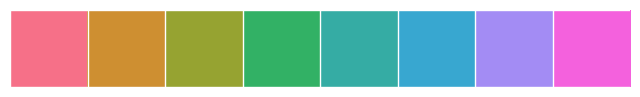

In [689]:
import pandas as pd
import numpy as np
from __future__ import division
import calendar
import time
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from dateutil.parser import parse
colorz=sns.color_palette("husl", 8)
sns.palplot(sns.color_palette("husl", 8))

In [690]:
# Queens data from January - February
jan=pd.read_excel('/Users/stella/Desktop/Particulate Data.xls')[1:]
feb=pd.read_excel('/Users/stella/Desktop/Particle Data_February 2017.xls')[1:]

In [691]:
del jan['Unnamed: 2'], jan['Unnamed: 4'], jan['Unnamed: 6'], jan['Unnamed: 8'], jan['Unnamed: 10']
del feb['Unnamed: 2'], feb['Unnamed: 4'], feb['Unnamed: 6'], feb['Unnamed: 8'], feb['Unnamed: 10']

In [692]:
jan.head()

,Station: Queens College Periodically: 1/1/2017 12:00 AM-2/13/2017 4:00 PM Type: AVG 1 Min. [1 Min.],Unnamed: 1,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9
1,NaN,1405-DF TEOM,1405-DF TEOM,1405-DF TEOM,TSI 3783 Ultrafine,1405-DF TEOM
2,Date & Time,PM25 MC,PMcoarse MC,PM10 MC,Particle Count,PM25FEM MC
3,NaN,ug/m3LC,ug/m3LC,ug/m3LC,#/cm3,ug/m3LC
4,1/1/2017 12:00 AM,3.7,3.7,7.4,8270,3
5,1/1/2017 12:01 AM,3.7,3.7,7.4,8450,3


In [693]:
jan=jan.rename(index=str, columns={"Station: Queens College  Periodically: 1/1/2017 12:00 AM-2/13/2017 4:00 PM  Type: AVG 1 Min. [1 Min.]":"Datetime",
                                   "Unnamed: 1":"PM2.5_MC (ug/m3)",
                                   "Unnamed: 3":"PMcrs_MC (ug/m3)",
                                   "Unnamed: 5":"PM10_MC (ug/m3)",
                                   "Unnamed: 7":"Ultrafine (#/cm3)",
                                   "Unnamed: 9":"PM2.5_FEM_MC (ug/m3)"
                                  })

In [694]:
feb.head()

,SiteReport - Site Queens College Report : TimeBeginning,Unnamed: 1,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9
1,Date&Time,PM2.5_MC,PM2.5_FEM_MC,PMcrs_MC,PM10_MC,Ultrafine
2,NaN,ug/m^3,ug/m^3,ug/m^3,ug/m^3,#/cm^3
3,2/1/2017 12:00 AM,17.66,15.96,3.09,20.75,20400
4,2/1/2017 12:01 AM,17.66,15.96,3.09,20.75,20500
5,2/1/2017 12:02 AM,17.66,15.96,3.09,20.75,21000


In [695]:
feb=feb.rename(index=str, columns={"SiteReport - Site Queens College Report : TimeBeginning":"Datetime",
                                   "Unnamed: 1":"PM2.5_MC (ug/m3)",
                                   "Unnamed: 3":"PM2.5_FEM_MC (ug/m3)",
                                   "Unnamed: 5":"PMcrs_MC (ug/m3)",
                                   "Unnamed: 7":"PM10_MC (ug/m3)",
                                   "Unnamed: 9":"Ultrafine (#/cm3)"
                                  })

In [696]:
jan=jan[3:].reset_index()
feb=feb[2:-8].reset_index()
del jan['index'], feb['index']

In [697]:
jan.head()

,Datetime,PM2.5_MC (ug/m3),PMcrs_MC (ug/m3),PM10_MC (ug/m3),Ultrafine (#/cm3),PM2.5_FEM_MC (ug/m3)
0,1/1/2017 12:00 AM,3.7,3.7,7.4,8270,3
1,1/1/2017 12:01 AM,3.7,3.7,7.4,8450,3
2,1/1/2017 12:02 AM,3.7,3.7,7.4,9620,3
3,1/1/2017 12:03 AM,3.7,3.8,7.5,9670,3
4,1/1/2017 12:04 AM,3.7,3.8,7.5,8430,3


In [698]:
jan.tail()

,Datetime,PM2.5_MC (ug/m3),PMcrs_MC (ug/m3),PM10_MC (ug/m3),Ultrafine (#/cm3),PM2.5_FEM_MC (ug/m3)
44635,1/31/2017 11:55 PM,17.7,3.1,20.8,19900,16
44636,1/31/2017 11:56 PM,17.7,3.1,20.8,19800,16
44637,1/31/2017 11:57 PM,17.7,3.1,20.8,19600,16
44638,1/31/2017 11:58 PM,17.7,3.1,20.8,19900,16
44639,1/31/2017 11:59 PM,17.7,3.1,20.8,20300,16


In [699]:
feb.head()

,Datetime,PM2.5_MC (ug/m3),PM2.5_FEM_MC (ug/m3),PMcrs_MC (ug/m3),PM10_MC (ug/m3),Ultrafine (#/cm3)
0,2/1/2017 12:00 AM,17.66,15.96,3.09,20.75,20400
1,2/1/2017 12:01 AM,17.66,15.96,3.09,20.75,20500
2,2/1/2017 12:02 AM,17.66,15.96,3.09,20.75,21000
3,2/1/2017 12:03 AM,17.66,15.96,3.09,20.75,21200
4,2/1/2017 12:04 AM,17.66,15.96,3.09,20.75,21000


In [700]:
feb.tail()

,Datetime,PM2.5_MC (ug/m3),PM2.5_FEM_MC (ug/m3),PMcrs_MC (ug/m3),PM10_MC (ug/m3),Ultrafine (#/cm3)
40315,2/28/2017 11:55 PM,-2.1,-2.1,4.76,2.66,21900
40316,2/28/2017 11:56 PM,-2.1,-2.1,4.76,2.66,21900
40317,2/28/2017 11:57 PM,-2.1,-2.1,4.76,2.66,22300
40318,2/28/2017 11:58 PM,-2.1,-2.1,4.76,2.66,24700
40319,2/28/2017 11:59 PM,-2.1,-2.1,4.76,2.66,25800


In [701]:
jf=pd.concat([jan,feb]).reset_index()
del jf['index']

In [702]:
jf['Datetime']=jf['Datetime'].apply(lambda x: parse(x))

In [703]:
jf.head()

,Datetime,PM10_MC (ug/m3),PM2.5_FEM_MC (ug/m3),PM2.5_MC (ug/m3),PMcrs_MC (ug/m3),Ultrafine (#/cm3)
0,2017-01-01 00:00:00,7.4,3,3.7,3.7,8270
1,2017-01-01 00:01:00,7.4,3,3.7,3.7,8450
2,2017-01-01 00:02:00,7.4,3,3.7,3.7,9620
3,2017-01-01 00:03:00,7.5,3,3.7,3.8,9670
4,2017-01-01 00:04:00,7.5,3,3.7,3.8,8430


In [704]:
jf=jf[(jf['PM10_MC (ug/m3)'].apply(lambda x: type(x)!=str)) &
(jf['PM2.5_FEM_MC (ug/m3)'].apply(lambda x: type(x)!=str)) &
(jf['PM2.5_MC (ug/m3)'].apply(lambda x: type(x)!=str)) &
(jf['PMcrs_MC (ug/m3)'].apply(lambda x: type(x)!=str))]

In [705]:
# INDOOR DATA
ildsa=pd.read_excel('/Users/stella/Desktop/realeco_queens-college-aqindoor_2017-01-04t195400_2017-03-01t195400.xlsx',
                     sheetname=0).set_index('time')
ipm25=pd.read_excel('/Users/stella/Desktop/realeco_queens-college-aqindoor_2017-01-04t195400_2017-03-01t195400.xlsx',
                     sheetname=1).set_index('time')
ipn=pd.read_excel('/Users/stella/Desktop/realeco_queens-college-aqindoor_2017-01-04t195400_2017-03-01t195400.xlsx',
                     sheetname=2).set_index('time')

In [706]:
len(ildsa),len(ipm25),len(ipn)

(80816, 80692, 80831)

In [707]:
ildsa.head()

,value (µm²/cm³)
time,
2017-01-04 14:54:00,7.682566
2017-01-04 14:55:00,7.468002
2017-01-04 14:56:00,7.322766
2017-01-04 14:57:00,7.393909
2017-01-04 14:58:00,7.407318


In [708]:
ipm25.head()

,value (µg/m³)
time,
2017-01-04 14:54:00,3.046295
2017-01-04 14:55:00,2.973560
2017-01-04 14:56:00,2.981562
2017-01-04 14:57:00,3.203761
2017-01-04 14:58:00,3.236505


In [709]:
ipn.head()

,value (1/cm³)
time,
2017-01-04 14:54:00,689.331
2017-01-04 14:55:00,668.588
2017-01-04 14:56:00,647.853
2017-01-04 14:57:00,632.549
2017-01-04 14:58:00,630.789


In [710]:
indoor=(ildsa.join(ipm25)).join(ipn).reset_index()

In [711]:
indoor=indoor.rename(index=str, columns={'time':'Datetime',
                                         'value (µm²/cm³)':'ldsa (um2/cm3)',
                                         'value (µg/m³)':'pm25 (ug/m3)',
                                         'value (1/cm³)':'pn (P/cm3)'})

In [712]:
janfeb=jf.copy(False)

In [713]:
indoor=indoor.set_index('Datetime')

In [714]:
jf=jf.set_index('Datetime')

In [715]:
jf.head()

,PM10_MC (ug/m3),PM2.5_FEM_MC (ug/m3),PM2.5_MC (ug/m3),PMcrs_MC (ug/m3),Ultrafine (#/cm3)
Datetime,,,,,
2017-01-01 00:00:00,7.4,3,3.7,3.7,8270
2017-01-01 00:01:00,7.4,3,3.7,3.7,8450
2017-01-01 00:02:00,7.4,3,3.7,3.7,9620
2017-01-01 00:03:00,7.5,3,3.7,3.8,9670
2017-01-01 00:04:00,7.5,3,3.7,3.8,8430


In [716]:
indoor.head()

,ldsa (um2/cm3),pm25 (ug/m3),pn (P/cm3)
Datetime,,,
2017-01-04 14:54:00,7.682566,3.046295,689.331
2017-01-04 14:55:00,7.468002,2.973560,668.588
2017-01-04 14:56:00,7.322766,2.981562,647.853
2017-01-04 14:57:00,7.393909,3.203761,632.549
2017-01-04 14:58:00,7.407318,3.236505,630.789


In [717]:
indoor=indoor.reset_index()

In [718]:
jf=jf.reset_index()

In [719]:
indoor.head()

,Datetime,ldsa (um2/cm3),pm25 (ug/m3),pn (P/cm3)
0,2017-01-04 14:54:00,7.682566,3.046295,689.331
1,2017-01-04 14:55:00,7.468002,2.973560,668.588
2,2017-01-04 14:56:00,7.322766,2.981562,647.853
3,2017-01-04 14:57:00,7.393909,3.203761,632.549
4,2017-01-04 14:58:00,7.407318,3.236505,630.789


In [720]:
test=jf[5214:5219]

In [721]:
test=test.set_index('Datetime')

In [722]:
test2=indoor[0:5]

In [724]:
test2

,Datetime,ldsa (um2/cm3),pm25 (ug/m3),pn (P/cm3)
0,2017-01-04 14:54:00,7.682566,3.046295,689.331
1,2017-01-04 14:55:00,7.468002,2.973560,668.588
2,2017-01-04 14:56:00,7.322766,2.981562,647.853
3,2017-01-04 14:57:00,7.393909,3.203761,632.549
4,2017-01-04 14:58:00,7.407318,3.236505,630.789


In [725]:
test2=test2.set_index('Datetime')

In [726]:
indoor=indoor.set_index('Datetime')
jf=jf.set_index('Datetime')

In [727]:
indoor.head()

,ldsa (um2/cm3),pm25 (ug/m3),pn (P/cm3)
Datetime,,,
2017-01-04 14:54:00,7.682566,3.046295,689.331
2017-01-04 14:55:00,7.468002,2.973560,668.588
2017-01-04 14:56:00,7.322766,2.981562,647.853
2017-01-04 14:57:00,7.393909,3.203761,632.549
2017-01-04 14:58:00,7.407318,3.236505,630.789


In [728]:
df=jf.join(indoor).dropna().reset_index()
df=df.rename(columns={'index':'time'})

In [729]:
urban=pd.read_csv('/Users/stella/Desktop/1329_PEGASOR A_20170316200803_v2.csv')

In [730]:
urban['DateTime']=urban['DateTime'].apply(lambda x: parse(x))

In [731]:
urban['DateTime'][0]

Timestamp('2017-01-04 15:02:00')

In [ ]:
## urban.columns

In [733]:
urban=urban.rename(columns={'MEASURE_PA_LABEL':'LDSA (um2/cm3)',
                      'MEASURE_MG_LABEL':'PN (#/cm3)',
                      'MEASURE_N_LABEL':'PM2.5 (ug/m3)',
                      'MEASURE_PA_LABEL.1':'LDSA-1 (um2/cm3)',
                      'MEASURE_MG_LABEL.1':'PN-1 (#/cm3)',
                      'MEASURE_N_LABEL.1':'PM2.5-1 (ug/m3)',
                      'MEASURE_PA_LABEL.2':'LDSA-2 (um2/cm3)',
                      'MEASURE_MG_LABEL.2':'PN-2 (#/cm3)',
                      'MEASURE_N_LABEL.2':'PM2.5-2 (ug/m3)'
                     })

In [734]:
urban['DateTime'][153]

Timestamp('2017-01-04 17:35:00')

In [735]:
df['Datetime'][8]

Timestamp('2017-01-04 15:02:00')

In [736]:
urban=urban.set_index('DateTime')
df=df.set_index('Datetime')

In [737]:
test=urban.join(df)

In [738]:
test=test.reset_index()
test=test.rename(columns={'index':'time'})

In [739]:
test=test[(test['time']>=datetime.date(2017,1,5)) & (test['time']<datetime.date(2017,3,1))]

In [782]:
test=test[(test['LDSA (um2/cm3)']>0) &
(test['LDSA-1 (um2/cm3)']>0) &
(test['LDSA-2 (um2/cm3)']>0) &
(test['PM10_MC (ug/m3)']>0) &
(test['PM2.5 (ug/m3)']>0) &
(test['PM2.5-1 (ug/m3)']>0) &
(test['PM2.5-2 (ug/m3)']>0) &
(test['PM2.5_FEM_MC (ug/m3)']>0) &
(test['PM2.5_MC (ug/m3)']>0) &
(test['PMcrs_MC (ug/m3)']>0) &
(test['PN (#/cm3)']>0) &
(test['PN-1 (#/cm3)']>0) &
(test['PN-2 (#/cm3)']>0) &
(test['Ultrafine (#/cm3)']>0) &
(test['ldsa (um2/cm3)']>0) &
(test['pm25 (ug/m3)']>0) &
(test['pn (P/cm3)']>0)]

In [765]:
test=test.reset_index()

In [767]:
del test['index']

In [784]:
df=test.copy(False)

In [785]:
del df['PM10_MC (ug/m3)'], df['PMcrs_MC (ug/m3)']

In [786]:
del df['LDSA (um2/cm3)'], df['LDSA-1 (um2/cm3)'], df['LDSA-2 (um2/cm3)']

In [808]:
x=df['PN (#/cm3)']
y=df['Ultrafine (#/cm3)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.374300701084


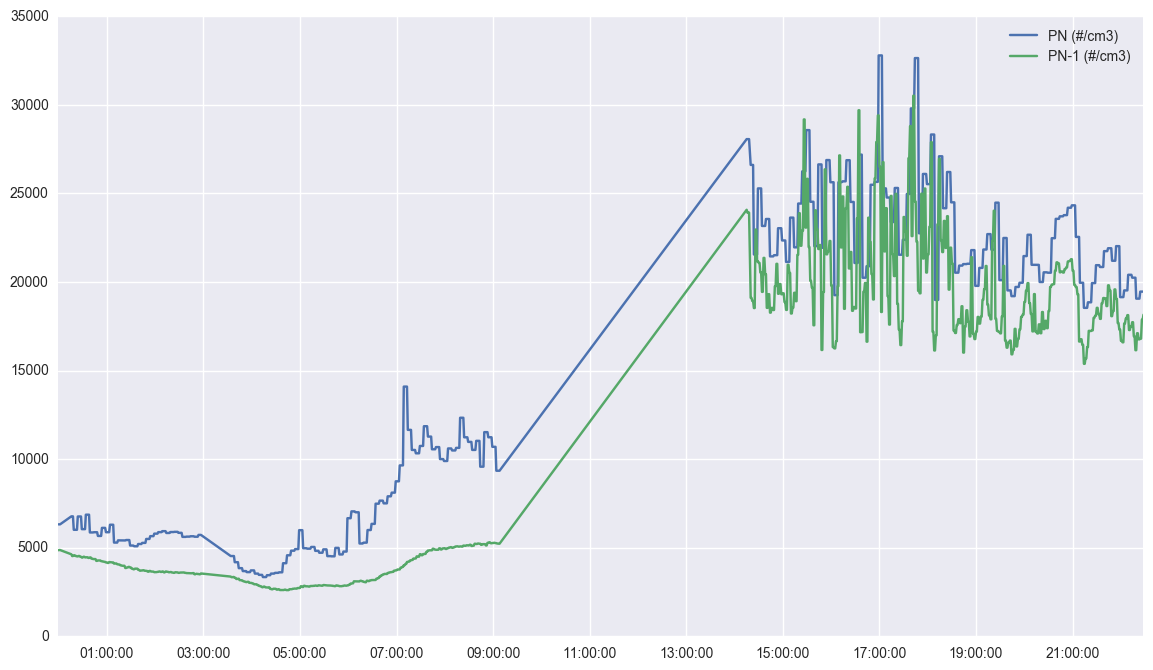

In [930]:
plt.figure(figsize=(14,8))
plt.plot(df['time'][0:1000],df['PN (#/cm3)'][0:1000])
plt.plot(df['time'][0:1000],df['PN-1 (#/cm3)'][0:1000])
#plt.plot(df['time'][0:1000],df['PN-2 (#/cm3)'][0:1000])
#plt.plot(df['time'][0:1000],df['Ultrafine (#/cm3)'][0:1000])
plt.legend()

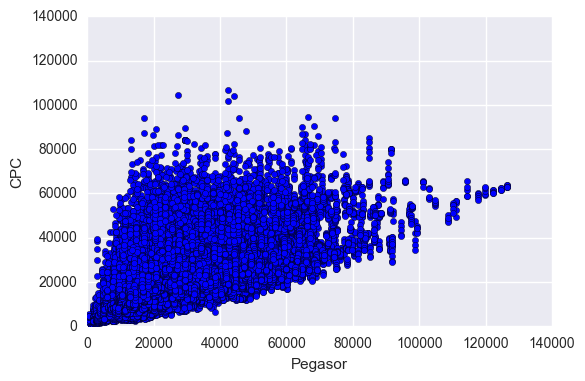

In [815]:
plt.scatter(df['PN (#/cm3)'],df['Ultrafine (#/cm3)'])
plt.xlabel('Pegasor')
plt.xlim(0,140000)
plt.ylim(0,140000)
plt.ylabel('CPC')

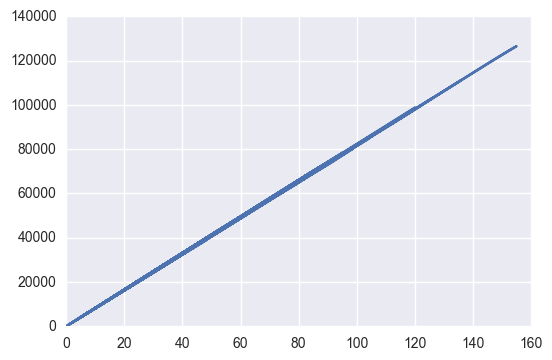

In [812]:
#plt.plot(test['LDSA (um2/cm3)'],test['PM2.5 (ug/m3)'])
plt.plot(test['LDSA (um2/cm3)'],test['PN (#/cm3)'])

In [929]:
df['time'][60346:-10600]

66380   2017-02-19 23:58:00
66381   2017-02-19 23:59:00
66382   2017-02-20 00:00:00
66383   2017-02-20 00:01:00
66384   2017-02-20 00:02:00
66385   2017-02-20 00:03:00
66386   2017-02-20 00:04:00
66387   2017-02-20 00:05:00
66388   2017-02-20 00:06:00
66389   2017-02-20 00:07:00
66390   2017-02-20 00:08:00
66391   2017-02-20 00:09:00
66392   2017-02-20 00:10:00
66393   2017-02-20 00:11:00
66394   2017-02-20 00:12:00
66395   2017-02-20 00:13:00
66396   2017-02-20 00:14:00
66397   2017-02-20 00:15:00
66398   2017-02-20 00:16:00
66399   2017-02-20 00:17:00
66400   2017-02-20 00:18:00
66401   2017-02-20 00:19:00
66402   2017-02-20 00:20:00
66403   2017-02-20 00:21:00
66404   2017-02-20 00:22:00
66405   2017-02-20 00:23:00
66406   2017-02-20 00:24:00
66407   2017-02-20 00:25:00
66408   2017-02-20 00:26:00
66409   2017-02-20 00:27:00
                ...        
67688   2017-02-20 21:58:00
67689   2017-02-20 21:59:00
67690   2017-02-20 22:00:00
67691   2017-02-20 22:01:00
67692   2017-02-20 2

In [916]:
df.columns

Index(['time', 'PN (#/cm3)', 'PM2.5 (ug/m3)', 'PN-1 (#/cm3)',
       'PM2.5-1 (ug/m3)', 'PN-2 (#/cm3)', 'PM2.5-2 (ug/m3)',
       'PM2.5_FEM_MC (ug/m3)', 'PM2.5_MC (ug/m3)', 'Ultrafine (#/cm3)',
       'ldsa (um2/cm3)', 'pm25 (ug/m3)', 'pn (P/cm3)'],
      dtype='object')

In [925]:
time1=60570
time2=-10900

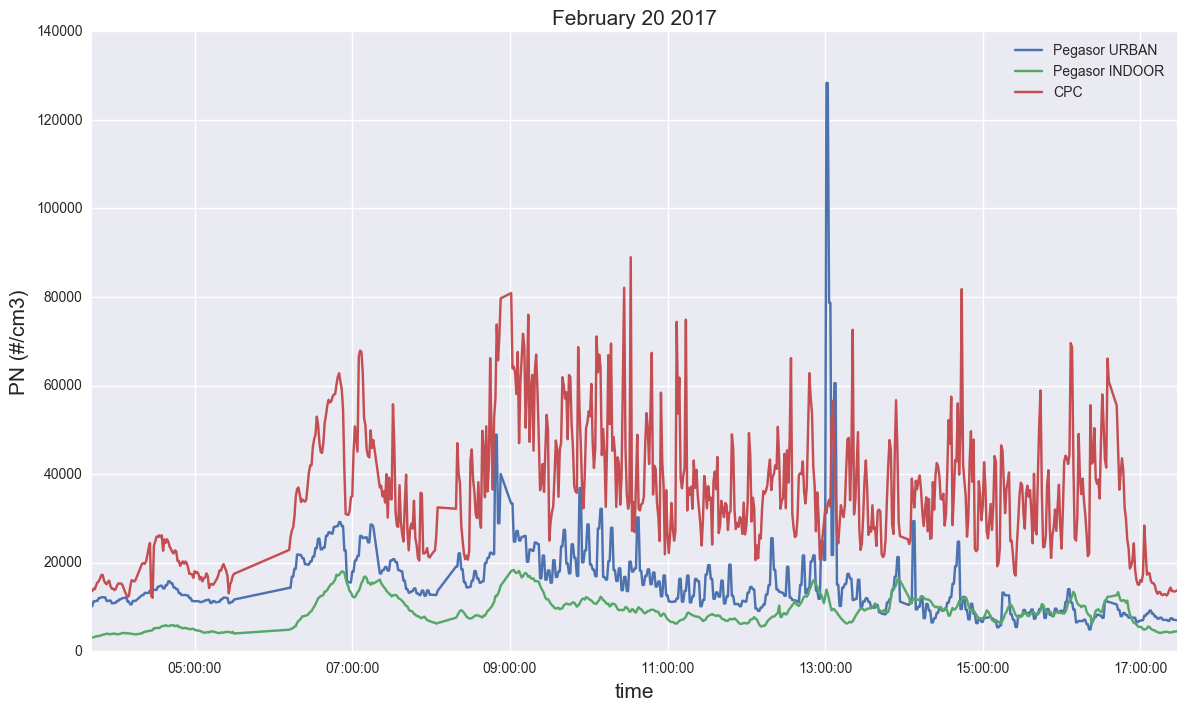

In [927]:
plt.figure(figsize=(14,8))
plt.plot(df['time'][time1:time2],df['PN-1 (#/cm3)'][time1:time2],label='Pegasor URBAN')
plt.plot(df['time'][time1:time2],df['pn (P/cm3)'][time1:time2]*10, label='Pegasor INDOOR')
plt.plot(df['time'][time1:time2],df['Ultrafine (#/cm3)'][time1:time2], label='CPC')
#plt.plot(df['time'],df['PM2.5_MC (ug/m3)'])
plt.title('February 20 2017',fontsize=15)
plt.ylabel('PN (#/cm3)',fontsize=15)
plt.xlabel('time',fontsize=15)
plt.legend()

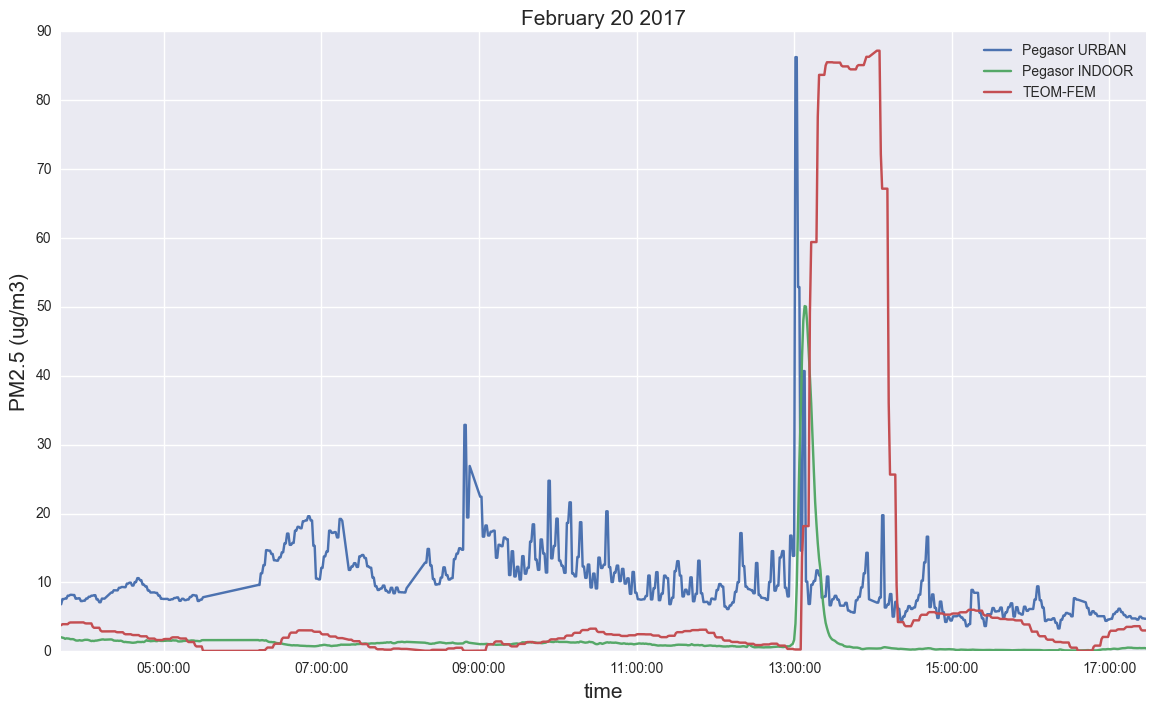

In [928]:
plt.figure(figsize=(14,8))
#plt.plot(df['time'][time1:-10900],df['PM2.5-2 (ug/m3)'][time1:-10900]*14)
plt.plot(df['time'][time1:time2],df['PM2.5-1 (ug/m3)'][time1:time2]*14,label='Pegasor URBAN')
plt.plot(df['time'][time1:time2],df['pm25 (ug/m3)'][time1:time2], label='Pegasor INDOOR')
plt.plot(df['time'][time1:time2],df['PM2.5_FEM_MC (ug/m3)'][time1:time2],label='TEOM-FEM')
#plt.plot(df['time'],df['PM2.5_MC (ug/m3)'])
plt.title('February 20 2017',fontsize=15)
plt.ylabel('PM2.5 (ug/m3)',fontsize=15)
plt.xlabel('time',fontsize=15)
plt.legend()

(0, 100)

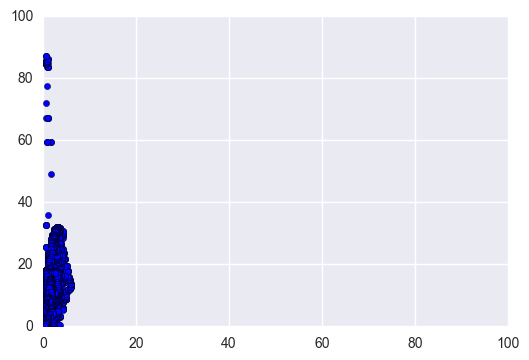

In [816]:
plt.scatter(df['PM2.5 (ug/m3)'],df['PM2.5_FEM_MC (ug/m3)'])
plt.xlim([0,100])
plt.ylim(0,100)

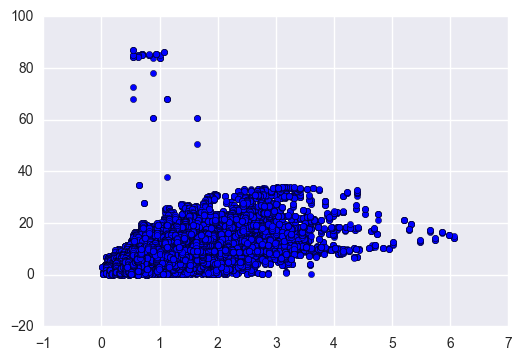

In [802]:
plt.scatter(df['PM2.5 (ug/m3)'],df['PM2.5_MC (ug/m3)'])

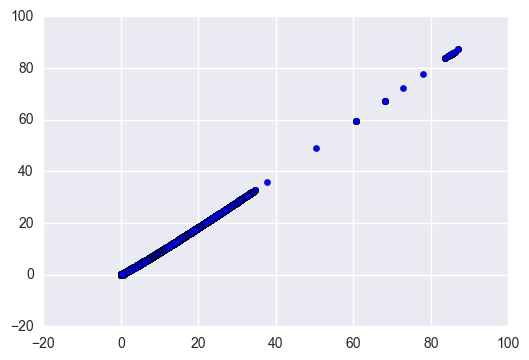

In [803]:
plt.scatter(df['PM2.5_MC (ug/m3)'],df['PM2.5_FEM_MC (ug/m3)'])

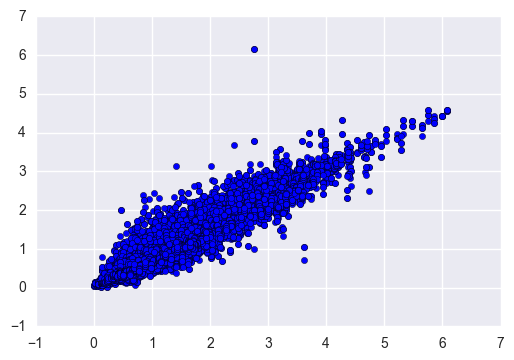

In [799]:
plt.scatter(df['PM2.5 (ug/m3)'],df['PM2.5-1 (ug/m3)'])

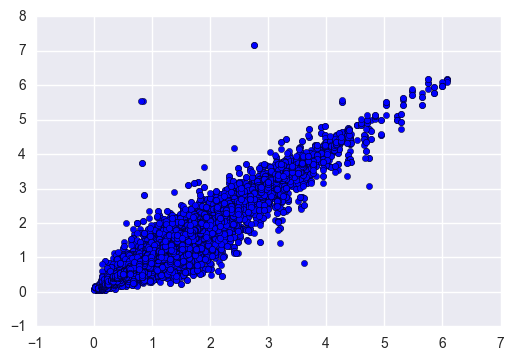

In [800]:
plt.scatter(df['PM2.5 (ug/m3)'],df['PM2.5-2 (ug/m3)'])

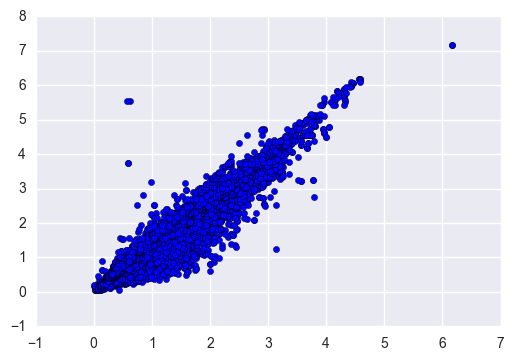

In [931]:
plt.scatter(df['PM2.5-1 (ug/m3)'],df['PM2.5-2 (ug/m3)'])